# Pymaceuticals Inc.
---

### Analysis

    The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182). The total count of mice by gender also showed that 124 female mice and 125 male mice.
    
    The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
    
    The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(study_results,mouse_metadata, on="Mouse ID", how ="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].value_counts()
number_of_mices=len(mice)
number_of_mices

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint" ]),"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df=combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_data[combined_data["Mouse ID"].isin(duplicate_mice_id)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice=cleaned_df["Mouse ID"].nunique()
mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median= cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var= cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std= cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem= cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats= pd.DataFrame({"Mean Tumor Volume":regimen_mean, 
                            "Median Tumor Volume":regimen_median, 
                           "Tumor Volume Variance":regimen_var, 
                           "Tumor Volume Std. Dev.":regimen_std, 
                           "Tumor Volume Std. Err.":regimen_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

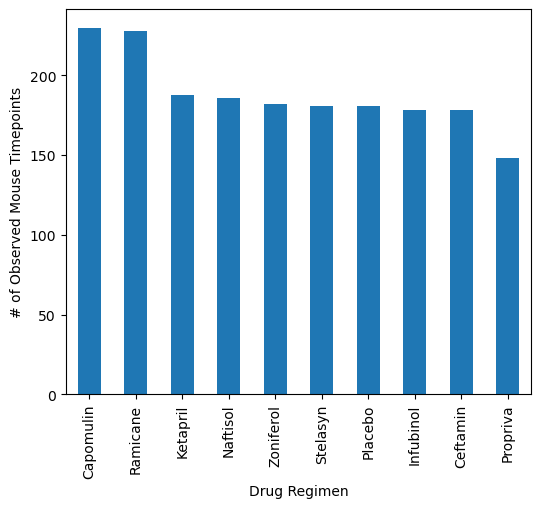

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = cleaned_df["Drug Regimen"].value_counts()
mice_count.sort_values(ascending= False).plot(kind="bar" , figsize =(6,5)) 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()                                       

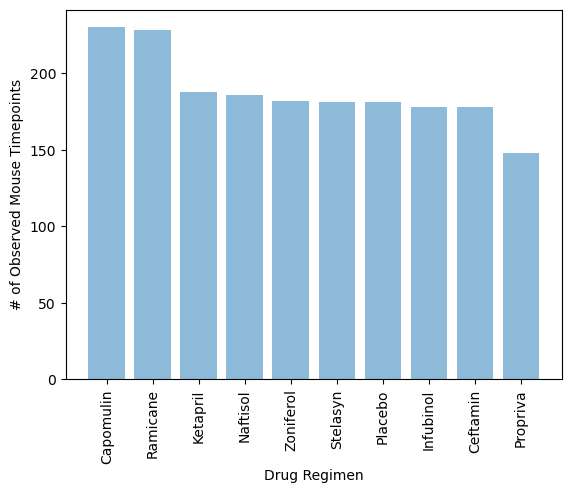

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = cleaned_df["Drug Regimen"].value_counts()
x_axis= mice_count.index.values
y_axis= mice_count.values

plt.bar(x_axis, y_axis, alpha=0.5, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

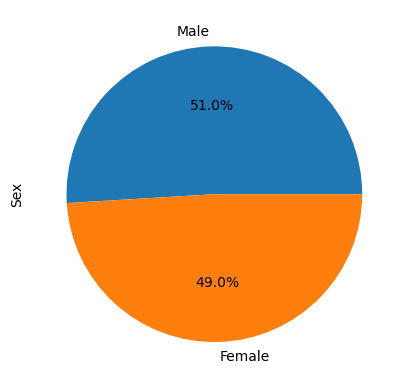

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_using_pandas = cleaned_df.groupby(["Sex"])["Mouse ID"].count()
pie_chart_using_pandas.sort_values(ascending= False).plot(kind="pie", startangle = 360, autopct = "%1.1f%%") 
plt.ylabel("Sex")
plt.show() 

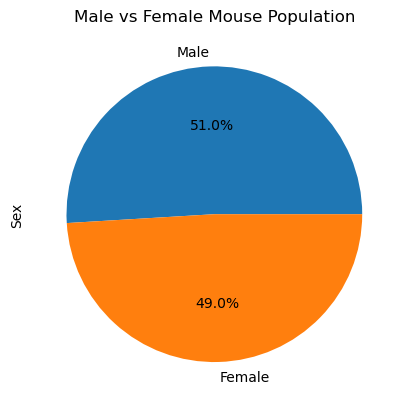

In [35]:
plot = pie_chart_using_pandas.sort_values(ascending= False).plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 
   
 # Determine outliers using upper and lower bounds
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = cleaned_df[cleaned_df["Drug Regimen"].isin(drug_list)]

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:


        treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1



------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

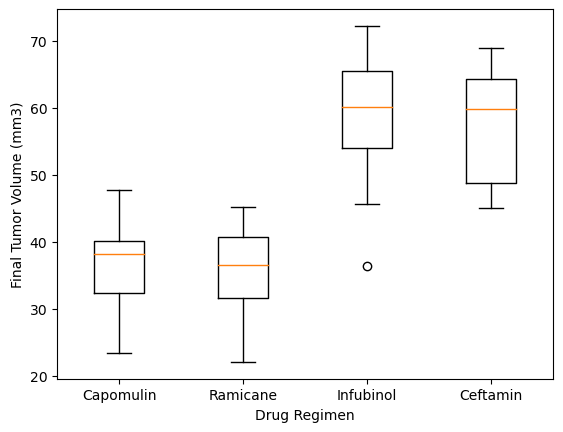

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

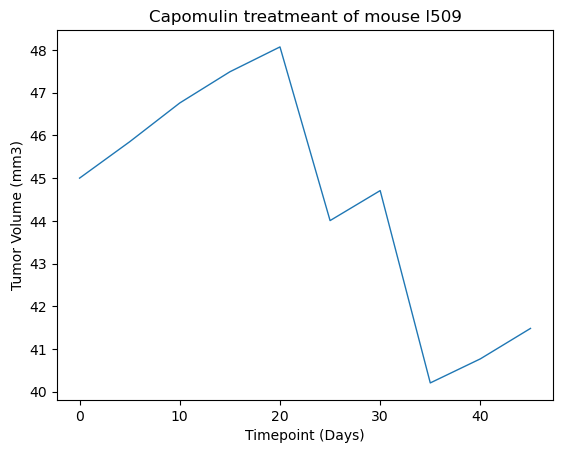

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size, linewidth=1, markersize=15,label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

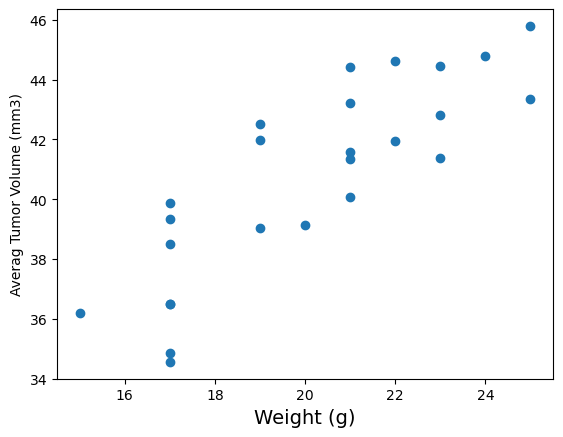

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(["Mouse ID"]).mean(int)

marker_size=15
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
print(f" The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

 The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


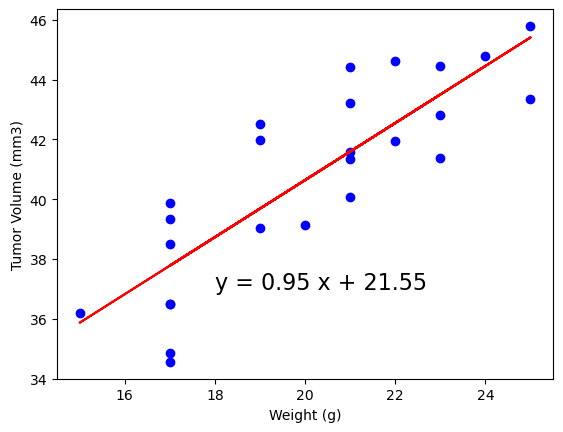

In [19]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq, (18,37), fontsize=16)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()